# 1. INTRODUCTION
This case study is the Capstone Project of Google Data Analytics Professional Certificate . In this case study I am working as a junior data analyst in the marketing analyst team at Cyclistic, a fictional bike-share company in Chicago.

Cyclistic is a bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From the insights, our team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve our recommendations, so they must be backed up with compelling data insights and professional data visualizations.

There are 3 pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as Casual riders. Customers who purchase annual memberships are Cyclistic members.

In order to answer the key business questions, I followed the steps of the data analysis process: ask, prepare, process, analyze, share, and act.

# 2. Ask
How do Annual members and Casual riders use Cyclistic bikes differently?
The key stakeholders are:
Lily Moreno, the director of marketing and my manager.
Cyclistic executive team.
First the Cyclistic executive team must approve our recommendations, so they must be backed up with data insights and data visualizations.

Then from the insights of my analysis, my team will design a new marketing strategy to convert casual riders into annual members.

# 3. Prepare
The data I used is Cyclistic’s Historical Trip Data to analyze and identify trends.

The previous 12 months data from 2020 April 1 to 2021 April 30 is used for analysis.

The data is stored in CSV files. Each file contains one month data. Thus a total of 12 .csv files.

The data is structured data ie., Organised data.

The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate.

The data has been made available by Motivate International Inc. under this license.

As this data is collected by a real bike sharing company in Chicago, there are no issues with bias or credibility. So its Reliable, Original, Current and Cited (as in ROCCC). I do not think its Comprehensive because this data lacks some information.

As of data Integrity, its Accurate, Consistent and Trustworthy.

Limitations

The data-privacy issues prohibit me from using riders’ personally identifiable information. This means that I won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.

The financial information such as each Ride Id ticket fare is not available.

If the personally identifiable information and financial information were available, I could have calculated whether the casual riders had spent more money than if they opt for taking annual memberships.

This data does not contain data about the use of reclining bikes, hand tricycles and cargo bikes. It is said that about 8% of total riders use assistive options.

# 4. Processing Phase.

In [129]:
#importing libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import cufflinks as cf



In [19]:
#importing 12 datasets
Oct_2020 = pd.read_csv('202010-divvy-tripdata.csv')
Nov_2020 = pd.read_csv('202011-divvy-tripdata.csv')
Dec_2020 = pd.read_csv('202012-divvy-tripdata.csv')
Jan_2021 = pd.read_csv('202101-divvy-tripdata.csv')
Feb_2021 = pd.read_csv('202102-divvy-tripdata.csv')
Mar_2021 = pd.read_csv('202103-divvy-tripdata.csv')
Apr_2020 = pd.read_csv('202104-divvy-tripdata.csv')
May_2020 = pd.read_csv('202005-divvy-tripdata.csv')
Jun_2020 = pd.read_csv('202006-divvy-tripdata.csv')
Jul_2020 = pd.read_csv('202007-divvy-tripdata.csv')
Aug_2020 = pd.read_csv('202008-divvy-tripdata.csv')
Sep_2020 = pd.read_csv('202009-divvy-tripdata.csv')


In [22]:
# Joining 12 CSV's into 1 and naming it as "df".
df = pd.concat([Oct_2020,Nov_2020,Dec_2020,Jan_2021,Feb_2021,Mar_2021,Apr_2020,May_2020,Jun_2020,Jul_2020,Aug_2020,Sep_2020], ignore_index = True)


In [24]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313,Rush St & Hubbard St,125,41.926101,-87.638977,41.890345,-87.626068,casual
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227,Kedzie Ave & Milwaukee Ave,260,41.948172,-87.663911,41.929528,-87.707818,casual
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102,University Ave & 57th St,423,41.773462,-87.585372,41.791455,-87.600050,casual
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165,Broadway & Sheridan Rd,256,41.950855,-87.659244,41.952809,-87.650103,casual
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190,Stave St & Armitage Ave,185,41.928857,-87.663962,41.917777,-87.691434,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742197,151752B99EA40774,electric_bike,2020-09-26 12:24:38,2020-09-26 12:37:41,Damen Ave & Wellington Ave,162,Campbell Ave & Montrose Ave,482,41.935862,-87.678513,41.961574,-87.691226,casual
3742198,D022E7106FFA648C,electric_bike,2020-09-26 17:19:04,2020-09-26 17:39:26,Torrence Ave & 106th St,707,NaN,NaN,41.702853,-87.559897,41.720000,-87.580000,casual
3742199,16F6F14FE158E720,electric_bike,2020-09-26 17:58:15,2020-09-26 18:43:59,NaN,NaN,Torrence Ave & 106th St,707,41.720000,-87.580000,41.702830,-87.559930,casual
3742200,FA6D0FE576341B6B,electric_bike,2020-09-25 19:21:53,2020-09-25 20:37:06,Stockton Dr & Wrightwood Ave,324,NaN,NaN,41.931254,-87.638701,41.890000,-87.610000,casual


In [28]:
#Displaying top 5 top
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313,Rush St & Hubbard St,125,41.926101,-87.638977,41.890345,-87.626068,casual
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227,Kedzie Ave & Milwaukee Ave,260,41.948172,-87.663911,41.929528,-87.707818,casual
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102,University Ave & 57th St,423,41.773462,-87.585372,41.791455,-87.600050,casual
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165,Broadway & Sheridan Rd,256,41.950855,-87.659244,41.952809,-87.650103,casual
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190,Stave St & Armitage Ave,185,41.928857,-87.663962,41.917777,-87.691434,casual


In [30]:
#Displaying bottom 5
df.tail(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
3742197,151752B99EA40774,electric_bike,2020-09-26 12:24:38,2020-09-26 12:37:41,Damen Ave & Wellington Ave,162,Campbell Ave & Montrose Ave,482,41.935862,-87.678513,41.961574,-87.691226,casual
3742198,D022E7106FFA648C,electric_bike,2020-09-26 17:19:04,2020-09-26 17:39:26,Torrence Ave & 106th St,707,NaN,NaN,41.702853,-87.559897,41.720000,-87.580000,casual
3742199,16F6F14FE158E720,electric_bike,2020-09-26 17:58:15,2020-09-26 18:43:59,NaN,NaN,Torrence Ave & 106th St,707,41.720000,-87.580000,41.702830,-87.559930,casual
3742200,FA6D0FE576341B6B,electric_bike,2020-09-25 19:21:53,2020-09-25 20:37:06,Stockton Dr & Wrightwood Ave,324,NaN,NaN,41.931254,-87.638701,41.890000,-87.610000,casual
3742201,A48C9D5A2A7DCA34,electric_bike,2020-09-26 16:57:55,2020-09-26 17:31:20,State St & Kinzie St,47,Halsted St & Roscoe St,299,41.889235,-87.627997,41.943668,-87.648797,casual


## cleaning process


In [32]:
#Dropping columns that i do not need for my analysis
df = df.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])


KeyError: "['start_station_name' 'start_station_id' 'end_station_name'\n 'end_station_id' 'start_lat' 'start_lng' 'end_lat' 'end_lng'] not found in axis"

In [34]:
df

,ride_id,rideable_type,started_at,ended_at,member_casual
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual
...,...,...,...,...,...
3742197,151752B99EA40774,electric_bike,2020-09-26 12:24:38,2020-09-26 12:37:41,casual
3742198,D022E7106FFA648C,electric_bike,2020-09-26 17:19:04,2020-09-26 17:39:26,casual
3742199,16F6F14FE158E720,electric_bike,2020-09-26 17:58:15,2020-09-26 18:43:59,casual
3742200,FA6D0FE576341B6B,electric_bike,2020-09-25 19:21:53,2020-09-25 20:37:06,casual


In [38]:
#Checking datatypes
df.dtypes

ride_id          object
rideable_type    object
started_at       object
ended_at         object
member_casual    object
dtype: object

In [40]:
# Coverting datatype of "started_at" & "ended_at" columns to "datetime64" type.
df['started_at'] = df['started_at'].astype('datetime64')
df['ended_at'] = df['ended_at'].astype('datetime64')


In [42]:
#Rechecking Datatypes
df.dtypes

ride_id                  object
rideable_type            object
started_at       datetime64[ns]
ended_at         datetime64[ns]
member_casual            object
dtype: object

In [50]:
# Creating New Column "ride_length" and changing its datatype to "int32"
# In this column, each row contains the difference between "starting time" and "ending time" columns in minutes.
df['ride_length'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)
df['ride_length'] = df['ride_length'].astype('int32')





In [51]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual,17
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual,14
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual,8
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual,2
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual,16


In [54]:
#Sorting Values by "ride_length" column in Ascending order.
df.sort_values(by = 'ride_length')

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
709532,3ED2B8BCE6A914EF,electric_bike,2020-12-15 12:10:14,2020-11-25 08:00:16,member,-29049
675177,6DF34F98F5DB335F,electric_bike,2020-12-15 11:35:39,2020-11-25 07:40:56,member,-29034
674334,BE1F691E387D7072,docked_bike,2020-12-15 11:34:23,2020-11-25 08:00:15,member,-29014
736227,321F7AE3AEDBAA13,docked_bike,2020-12-15 12:12:43,2020-11-25 08:42:16,member,-29010
739257,BB4697B59E3FF12A,docked_bike,2020-12-15 11:34:38,2020-11-25 08:09:43,member,-29004
...,...,...,...,...,...,...
2464217,ADD7F1C41019C08E,docked_bike,2020-07-05 01:51:06,2020-08-08 12:13:19,casual,49582
2484642,3FABAAB71355D0A9,docked_bike,2020-07-05 14:25:39,2020-08-09 07:11:06,casual,49965
3499036,82D45025C42DBDA6,docked_bike,2020-09-05 08:50:15,2020-10-10 13:43:02,casual,50692
3482255,6F7C2DA80561D60C,docked_bike,2020-09-06 23:20:29,2020-10-12 11:46:25,casual,51145


In [56]:
# Its seen that many rows in some months contained negative values. 
# Such errors happened because the "ending time" is earlier than the "starting time" in their respective rows.
df[df['ride_length'] < 0].count()
# Number of rows containing Negative Values.

ride_id          1228
rideable_type    1228
started_at       1228
ended_at         1228
member_casual    1228
ride_length      1228
dtype: int64

In [58]:

# Number of rows containing "ride length" less than "1" minute.
df[df['ride_length'] < 1].count()

ride_id          64106
rideable_type    64106
started_at       64106
ended_at         64106
member_casual    64106
ride_length      64106
dtype: int64

In [60]:
# Removing 80845 rows containing negative values & ride length less than 1 minute. 
# Any trips that were below 60 seconds in length are potentially false starts or users trying to re-dock a bike to ensure it was secure.
df = df[df['ride_length'] >= 1]
df = df.reset_index()
df = df.drop(columns=['index'])
df


,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual,17
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual,14
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual,8
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual,2
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual,16
...,...,...,...,...,...,...
3678091,151752B99EA40774,electric_bike,2020-09-26 12:24:38,2020-09-26 12:37:41,casual,13
3678092,D022E7106FFA648C,electric_bike,2020-09-26 17:19:04,2020-09-26 17:39:26,casual,20
3678093,16F6F14FE158E720,electric_bike,2020-09-26 17:58:15,2020-09-26 18:43:59,casual,45
3678094,FA6D0FE576341B6B,electric_bike,2020-09-25 19:21:53,2020-09-25 20:37:06,casual,75


<AxesSubplot:xlabel='member_casual', ylabel='ride_length'>

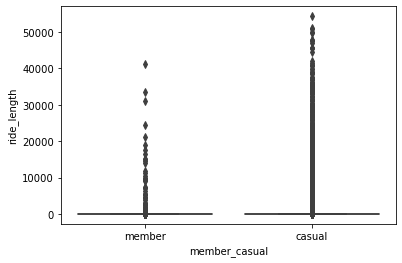

In [62]:
# Boxplot of column "Ride Length" to see the distribution of data between Member and Casual Rider.
sns.boxplot(data = df, x ='member_casual', y = 'ride_length', order = ['member', 'casual'])

## from the observation above it is seen that riders use bikes for more duration (might be returning bikes after days) than members.


In [64]:
# Coverting datatypes of each columns.
df = df.astype({'ride_id':'string', 'rideable_type':'category', 'member_casual':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678096 entries, 0 to 3678095
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        string        
 1   rideable_type  category      
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  category      
 5   ride_length    int32         
dtypes: category(2), datetime64[ns](2), int32(1), string(1)
memory usage: 105.2 MB


In [66]:
df.shape

(3678096, 6)

In [68]:
#Checking for null values
df.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
ride_length      0
dtype: int64

In [71]:
# Removing leading and trailing whitespaces in column "Ride Id".
df['ride_id'] = df['ride_id'].str.strip()

In [73]:
# View any duplicate rows.
df[df['ride_id'].duplicated()]

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length


## Analyze and share Phase


In [77]:
# Creating new columns "year", "month", "day_of_week", "hour" and Converting datatypes.
df['year'] = df['started_at'].dt.year

cats1 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = df['started_at'].dt.month_name()
df['month'] = df['month'].astype(CategoricalDtype(categories=cats1, ordered=False))

cats2 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['day_of_week'] = df['started_at'].dt.day_name()
df['day_of_week'] = df['day_of_week'].astype(CategoricalDtype(categories=cats2, ordered=False))

df['hour'] = df['started_at'].dt.hour

df = df.astype({'year':'int16', 'hour':'int8'})

In [78]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,year,month,day_of_week,hour
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,casual,17,2020,October,Saturday,19
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,casual,14,2020,October,Saturday,23
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,casual,8,2020,October,Saturday,23
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,casual,2,2020,October,Saturday,22
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,casual,16,2020,October,Saturday,19


# 5.1 Analyzing the differences in numbers of rides between casual riders and members

# 5.1A

In [80]:
pd.pivot_table(df,
              index = 'member_casual',
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

,count
,ride_id
member_casual,
casual,1521652
member,2156444
Total Count,3678096


In [85]:
fig_1 = df.groupby('member_casual', as_index=False).count()

px.bar(fig_1, y = 'member_casual', x = 'ride_id', range_x = [0,3000000],
        color = 'member_casual', 
        height = 300,
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

In [86]:
df_pv1 = pd.pivot_table(df, index = ['year', 'month', 'member_casual'], 
                        values = 'ride_id', 
                        aggfunc = ['count'], 
                        margins = True, 
                        margins_name = 'Total Count') 
df_pv1 = df_pv1.loc[(df_pv1 != 0).any(axis=1)] 
df_pv1
#5.1B Number of Riders in each month.¶


count
                                       ride_id
year        month     member_casual           
2020        May       casual           86216.0
                      member          111615.0
            June      casual          153319.0
                      member          185249.0
            July      casual          266691.0
                      member          276654.0
            August    casual          284375.0
                      member          325065.0
            September casual          226835.0
                      member          295491.0
            October   casual          141922.0
                      member          237996.0
            November  casual           86730.0
                      member          168432.0
            December  casual           29665.0
                      member           99832.0
2021        January   casual           17842.0
                      member           77573.0
            February  casual            9964.0
                      member           38685.0
            March     casual           83148.0
                      member          142375.0
            April     casual          134945.0
                      member          197477.0
Total Count                          3678096.0

In [87]:
fig_2 = df.groupby(['year', 'month', 'member_casual'], as_index=False).count()
fig_2 = fig_2[fig_2['ride_id'] != 0]

px.line(fig_2, x = 'month', y = 'ride_id', range_y = [0,450000],
        color = 'member_casual', 
        line_shape = 'spline',
        markers=True, 
        labels = {'ride_id': 'No. of Rides', 'month': 'Months (Oct 2020 - Sep 2021)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

In [ ]:
## 1) Shows that total number of member riders ia at the peak during August similira to Casual riders
## 2) The behaviour of casula riders tend to be the same



# 5.1.c Average number of rides in each weekday.

In [89]:
pd.pivot_table(df,
              index = ['day_of_week', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                           ride_id
day_of_week member_casual         
Sunday      casual          278142
            member          274162
Monday      casual          162312
            member          282533
Tuesday     casual          159759
            member          302256
Wednesday   casual          166312
            member          318552
Thursday    casual          174009
            member          314472
Friday      casual          226034
            member          329548
Saturday    casual          355084
            member          334921
Total Count                3678096

In [92]:
fig_3 = df.groupby(['day_of_week', 'member_casual'], as_index=False).count()

px.line(fig_3, x = 'day_of_week', y = 'ride_id', range_y = [0,550000],
        color = 'member_casual',  
        line_shape = 'spline',
        markers=True,
        labels = {'ride_id': 'No. of Rides', 'day_of_week': 'Weekdays', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

In [93]:
#1 Almost both casual and members are using bike share more in weeekends though there are more casual riders on saturdays.
#2 there are fixed number of casual riders using on weekdays

# 5.1D Average number of rides in each hour


In [95]:
pd.pivot_table(df,
              index = ['hour', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                           ride_id
hour        member_casual         
0           casual           24573
            member           13494
1           casual           15428
            member            7625
2           casual            8210
            member            3932
3           casual            4413
            member            2507
4           casual            3726
            member            3854
5           casual            5772
            member           18480
6           casual           13652
            member           59073
7           casual           24404
            member          100185
8           casual           33689
            member          108751
9           casual           42848
            member           91569
10          casual           61451
            member           96519
11          casual           84611
            member          120256
12          casual          103648
            member          141461
13          casual          112654
            member          140327
14          casual          119385
            member          140448
15          casual          126317
            member          156446
16          casual          134641
            member          188013
17          casual          151001
            member          227872
18          casual          136353
            member          198869
19          casual          103974
            member          138397
20          casual           72463
            member           85027
21          casual           53012
            member           51614
22          casual           47438
            member           36687
23          casual           37989
            member           25038
Total Count                3678096

In [97]:
fig_4 = df.groupby(['hour', 'member_casual'], as_index=False).count()

fig_4a = px.line(fig_4, x = 'hour', y = 'ride_id', range_x = [0,23], range_y = [0,300000],
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 labels = {'ride_id': 'No. of Rides', 'hour': '24 Hours', 'member_casual': 'Member/Casual'},
                 hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True},
                 color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
fig_4a.update_xaxes(dtick=1)
fig_4a.show()

In [98]:
#1 In daytime there are more casual and member riders during afternoon and the peak is during evening
#2 There are less riders from both sides in the morning time.

# 5.2
# 5.2A 
Analyzing Differences in Average Ride length between casual riders and members.


In [100]:
#Average ride length in one year.
pd.pivot_table(df,
               index = 'member_casual',
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

,mean
,ride_length
member_casual,
casual,43.958953
member,15.595940
Total Ride Average,27.329901


In [103]:
fig_4 = round(df.groupby('member_casual', as_index=False).mean(),2)

px.bar(fig_4, y = 'member_casual', x = 'ride_length', range_x = [0,35],
        color = 'member_casual', 
        height = 300,
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

In [104]:
#1 Average ride of casual is twice more than that of members

Average Ride length in each month

In [105]:
pd.pivot_table(df,
               index = ['year', 'month', 'member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

mean
                                           ride_length
year               month     member_casual            
2020               May       casual          51.097580
                             member          19.566546
                   June      casual          51.587448
                             member          18.512931
                   July      casual          59.903829
                             member          17.549911
                   August    casual          45.108687
                             member          16.640198
                   September casual          38.268014
                             member          15.319813
                   October   casual          30.314469
                             member          13.800984
                   November  casual          31.756532
                             member          13.294522
                   December  casual          26.653733
                             member          12.421138
2021               January   casual          25.582222
                             member          12.565016
                   February  casual          49.699117
                             member          17.898255
                   March     casual          38.069527
                             member          13.677619
                   April     casual          37.993864
                             member          14.425999
Total Ride Average                           27.329901

In [106]:
fig_5 = round(df.groupby(['year', 'month', 'member_casual'], as_index=False).mean(),2).dropna()

px.bar(fig_5, x = 'month', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'month': 'Months (Oct 2020 - Sep 2021)'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

In [107]:
# Avergae ride of casual riders is more than twice that of members in all months
#July had the highest number of riders on average than other months

## 5.2c Average length in each weekday

In [109]:
pd.pivot_table(df,
               index = ['day_of_week', 'member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

mean
                                 ride_length
day_of_week        member_casual            
Sunday             casual          49.810759
                   member          17.552305
Monday             casual          44.038919
                   member          14.924097
Tuesday            casual          39.428664
                   member          14.605950
Wednesday          casual          39.967230
                   member          14.887108
Thursday           casual          41.317909
                   member          14.629487
Friday             casual          41.911938
                   member          15.328811
Saturday           casual          45.843786
                   member          17.299151
Total Ride Average                 27.329901

In [111]:
fig_6 = round(df.groupby(['day_of_week', 'member_casual'], as_index=False).mean(),2)

px.bar(fig_6, x = 'day_of_week', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'day_of_week': 'Weekdays'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

In [112]:
# Both riders have a maximum rider length in weekends
# Members riders over weekdays tend to remain the same.

# Analyzing differences in rideable type usage between casual riders and members

In [114]:
pd.pivot_table(df,
               index = ['rideable_type', 'member_casual'],
               values = ['ride_id'],
               aggfunc = ['count'],
               margins = True,
               margins_name = 'Total Rides')

count
                             ride_id
rideable_type member_casual         
classic_bike  casual          140261
              member          387708
docked_bike   casual         1105314
              member         1351671
electric_bike casual          276077
              member          417065
Total Rides                  3678096

In [116]:
fig_7 = df.groupby(['rideable_type', 'member_casual'], as_index=False).count()

px.bar(fig_7, x = 'rideable_type', y = 'ride_id',
        color = 'member_casual',
        barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'Member/Casual', 'rideable_type' : 'Rideable Type'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': False}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

In [117]:
#Dock type is the most rideable type of all.
#clasicic bike is the least used rideable type


# General insights

In [131]:
#1 Annual Members and Casual riders use cyclistic bike share differently
#2 The average ride length of casual riders are more than twice as of members
#3 Annual members usually use bike share for daily commuting while casual riders mopstly use bike share for leisure rides mostly during weekends